<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Kaggle/_02_SkinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Models , Valid Acc, Test Acc
# model_3_1_2 , 81.35%
# model_3_2_3 , 75.19%
# model_3_2_4 , 80.77%, 80.30%

In [ ]:
# Directories of actual data
root_dir = '/content/drive/My Drive/AI/SkinCancer/Melanoma/SkinCancerDataset'
train_dir = root_dir + '/train'
train_b_dir = train_dir + '/benign'
train_m_dir = train_dir + '/malignant'
test_dir = root_dir + '/test'
test_b_dir = test_dir + '/benign'
test_m_dir = test_dir + '/malignant'

In [ ]:
import os
import shutil

In [ ]:
train_b_files = os.listdir(train_b_dir)
train_m_files = os.listdir(train_m_dir)
test_b_files = os.listdir(test_b_dir)
test_m_files = os.listdir(test_m_dir)
train_b = len(train_b_files)
train_m = len(train_m_files)
test_b = len(test_b_files)
test_m = len(test_m_files)
print (f'Train B images : {train_b}')
print (f'Train M images : {train_m}')
print (f'Test B images : {test_b}')
print (f'Test M images : {test_m}')

Train B images : 0
Train M images : 0
Test B images : 0
Test M images : 0


In [ ]:
# Train/Val split
split = 0.2
val_b = (int) (train_b * split)
train_b = train_b - val_b

val_m = (int) (train_m * split)
train_m = train_m - val_m

print (f'Train B : {train_b}')
print (f'Val B : {val_b}')
print (f'Train M : {train_m}')
print (f'Val M : {val_m}')

Train B : 1152
Val B : 288
Train M : 958
Val M : 239


In [7]:
# Directories for dataset
root_dir = '/content/drive/My Drive/AI/SkinCancer/Dataset'

train_dir = root_dir + '/train'
val_dir = root_dir + '/val'
test_dir = root_dir + '/test'

train_0_dir = root_dir + '/train/0'
train_1_dir = root_dir + '/train/1'

val_0_dir = root_dir + '/val/0'
val_1_dir = root_dir + '/val/1'

test_0_dir = root_dir + '/test/0'
test_1_dir = root_dir + '/test/1'

In [ ]:
def moveDataset(source_dir, destination_dir, numberOfImages):
  files = os.listdir(source_dir)
  cnt = 0
  for file_name in files:
    if cnt == numberOfImages:
      break
    shutil.move(f'{source_dir}/{file_name}', destination_dir)
    cnt += 1
  print ('Done moving images!!')

In [ ]:
# moveDataset(train_b_dir, train_0_dir, train_b)
# moveDataset(train_m_dir, train_1_dir, train_m)

In [ ]:
# moveDataset(train_b_dir, val_0_dir, val_b)
# moveDataset(train_m_dir, val_1_dir, val_m)
# moveDataset(test_b_dir, test_0_dir, test_b)
# moveDataset(test_m_dir, test_1_dir, test_m)

Done moving images!!
Done moving images!!
Done moving images!!
Done moving images!!


In [8]:
# Importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [9]:
# Updating batch size from 20 to 40
# For train -> 1, 2, 4, 7, 8, 11, 14, 22, 28, 44, 56, 77, 88, 154, 308
# For val -> 1, 2, 3, 6, 23, 46, 69
TRAIN_BATCH_SIZE = 60
VAL_BATCH_SIZE = 40
TEST_BATCH_SIZE = 60

# define transforms for the training data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize(225),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5,0.5,0.5],
                                                            [0.5,0.5,0.5])])

# define transforms for the validation data
val_transforms = transforms.Compose([transforms.Resize(225),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5,0.5,0.5],
                                                            [0.5,0.5,0.5])])

test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5,0.5,0.5],
                                                           [0.5,0.5,0.5])])


# creating dataloader
train_set = datasets.ImageFolder(train_dir, transform=train_transforms)
train_loader = DataLoader(train_set, batch_size=TRAIN_BATCH_SIZE, shuffle=True,drop_last = True)

val_set = datasets.ImageFolder(val_dir, transform=val_transforms)
val_loader = DataLoader(val_set, batch_size=VAL_BATCH_SIZE, shuffle=True, drop_last=True)

test_set = datasets.ImageFolder(test_dir, transform=train_transforms)
test_loader = DataLoader(test_set, batch_size=TEST_BATCH_SIZE)


In [ ]:
print (len(train_loader.sampler))
print (len(val_loader.sampler))
print (len(test_loader.sampler))

2110
527
660


In [ ]:
classes = ['Benign', 'Malignant']

Text(0.5, 1.0, 'Benign')

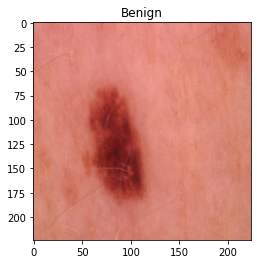

In [ ]:
# Visualizing one batch from training set

# helper function to un-normalize and display an image
def imshow(img):
  img = img.numpy().transpose((1, 2, 0))
  mean = np.array([0.5,0.5,0.5])
  std = np.array([0.5,0.5,0.5])
  img = std * img + mean
  img = np.clip(img, 0, 1)
  plt.imshow(img)   # convert from tensor image

dataiter = iter(train_loader)
images,labels = dataiter.next()

plt.figure(figsize=(25,4))
imshow(images[0])
plt.title(classes[labels[0]])

Text(0.5, 1.0, 'Malignant')

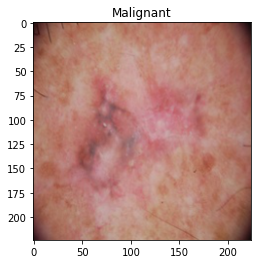

In [ ]:
plt.figure(figsize=(25,4))
idx = 55
imshow(images[idx])
plt.title(classes[labels[idx]])

In [10]:
# setting device configuration
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [11]:
def train(net, criterion, optimizer):
  #################
  #train the model#
  #################

  num_correct = 0
  num_samples = 0
  train_loss = 0.0
  net.train()
  print ('Training...', end=' ')
  for images, labels in train_loader:
    # move the images, and labels to cuda/cpu
    images = images.to(device)
    labels = labels.to(device)

    # clear the gradients of all optimized variables
    optimizer.zero_grad()

    # forward pass
    output = net(images).squeeze(1)
    
    # calculate loss
    loss = criterion(output, labels.float())

    # backward pass
    loss.backward()
    optimizer.step()

    # calculate training accuracy
    pred = (output > 0.7) * 1.0
    num_correct += (pred == labels).sum()
    num_samples += pred.size(0)

    # storing all the training losses
    train_loss += loss.item() * images.size(0)

  train_acc = float(num_correct) / float(num_samples) * 100.0
  train_loss = train_loss / (len(train_loader.sampler))
  print ('Done!!')
  return train_loss, train_acc

In [12]:
def validate(net, criterion):
  #####################
  # validate the model#
  #####################
  num_correct = 0
  num_samples = 0
  val_loss = 0.0
  net.eval()
  print ('Validating...', end=' ')
  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      output = net(images).squeeze(1)
      loss = criterion(output, labels.float())

      # calculating valid accuracy
      pred = ( output > 0.7 ) * 1.0
      num_correct += (pred == labels).sum()
      num_samples += pred.size(0)
      val_loss += loss.item() * images.size(0)
    
    val_acc = float(num_correct) / float(num_samples) * 100.0
    val_loss = val_loss / len(val_loader.sampler)
  print ('Done!!')
  return val_loss, val_acc

In [13]:
def run(epochs, net, model_path, criterion, optimizer):
  train_loss_list = []
  val_loss_list = []
  val_loss_min = np.inf
  best_acc = 0.0
  for epoch in range(1, epochs+1):
    print (f'Epoch: {epoch}/{epochs}')
    train_loss, train_acc = train(net, criterion, optimizer)
    val_loss, val_acc = validate(net, criterion)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)


    print (f'Metrics: [Train Loss: {train_loss:.6f} \t Train Acc: {train_acc:.2f}%]\t [Valid Loss: {val_loss:.6f} \t Valid Acc: {val_acc:.2f}%]')
    if val_loss <= val_loss_min:
      print (f'Valid loss decreased [{val_loss_min:.6f} -> {val_loss}] \t Saving Model...')
      val_loss_min = val_loss
      torch.save(net.state_dict(), model_path)
      best_acc = val_acc
  
  return train_loss_list, val_loss_list, best_acc

In [14]:
def plot_loss_function(train_loss, val_loss):
  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [15]:
def train_model(epochs, lr, net, model_path, opt):
  criterion = nn.BCELoss()
  if opt == 'adam':
    optimizer = optim.Adam(net.parameters(), lr=lr)
  if opt == 'sgd':
    optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.5,0.999))
  train_loss, val_loss, acc = run(epochs=epochs, net=net, model_path=model_path, criterion=criterion, optimizer=optimizer)
  plot_loss_function(train_loss, val_loss)
  return acc

In [16]:
def test_model(net):
  net.eval()
  num_correct = 0
  num_samples = 0
  TP = 0.0
  FN = 0.0
  with torch.no_grad():
    for images, labels in tqdm(test_loader):
      images = images.to(device)
      labels = labels.to(device)

      output = net(images).squeeze(1)

      pred = ( output > 0.7 ) * 1.0

      TP += ((pred==labels) & (pred==1)).sum()
      FN += ((pred!=labels) & (pred==0)).sum()
      
      num_correct += (pred == labels).sum()
      num_samples += pred.size(0)
    
  test_acc = float(num_correct) / float(num_samples) * 100.0
  recall = (float) (TP / (TP + FN))
  return test_acc, recall

In [17]:
class CNN(nn.Module):
  def __init__(self,conv_layers, dense_layers, filters, hidden, drop_prob):
    super(CNN, self).__init__()
    self.conv_layers = conv_layers
    self.dense_layers = dense_layers
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=filters[0], kernel_size=3, stride=1, padding=1)
    if conv_layers == 2:  
      self.conv2 = nn.Conv2d(in_channels=filters[0], out_channels=filters[1], kernel_size=3, stride=1, padding=1)
    elif conv_layers == 3:
      self.conv2 = nn.Conv2d(in_channels=filters[0], out_channels=filters[1], kernel_size=3, stride=1, padding=1)
      self.conv3 = nn.Conv2d(in_channels=filters[1], out_channels=filters[2], kernel_size=3, stride=1, padding=1)

    self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    dim = (224 / (2**conv_layers))
    input_size = (int) ( dim * dim * filters[conv_layers-1])

    self.fc1 = nn.Linear(input_size, hidden[0])
    if dense_layers == 1:
      self.fc2 = nn.Linear(hidden[0], 1)
    elif dense_layers == 2:
      self.fc2 = nn.Linear(hidden[0], hidden[1])
      self.fc3 = nn.Linear(hidden[1], 1)
    else:
      self.fc2 = nn.Linear(hidden[0], hidden[1])
      self.fc3 = nn.Linear(hidden[1], hidden[2])
      self.fc4 = nn.Linear(hidden[2], 1)

    self.dropout = nn.Dropout(p=drop_prob)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.pool(self.conv1(x)))
    if self.conv_layers == 2:
      x = self.relu(self.pool(self.conv2(x)))
    elif self.conv_layers == 3:
      x = self.relu(self.pool(self.conv2(x)))
      x = self.relu(self.pool(self.conv3(x)))

    x = x.view(x.shape[0], -1)
    x = self.dropout(x)
    x = self.relu(self.fc1(x))
    if self.dense_layers == 1:
      x = self.sigmoid(self.fc2(x))
    elif self.dense_layers == 2:
      x = self.dropout(x)
      x = self.relu(self.fc2(x))
      x = self.sigmoid(self.fc3(x))
    elif self.dense_layers == 3:
      x = self.dropout(x)
      x = self.relu(self.fc2(x))
      x = self.dropout(x)
      x = self.relu(self.fc3(x))
      x = self.sigmoid(self.fc4(x))
    return x

In [12]:
# Testing Network
input = torch.randn(60,3,224,224)
model = CNN(3,2,[16,32,64],[128,64], 0.2)
output = model(input)
print (output.shape)

torch.Size([60, 1])


Epoch: 1/5
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 4.701808 	 Train Acc: 66.57%]	 [Valid Loss: 0.551227 	 Valid Acc: 65.00%]
Valid loss decreased [inf -> 0.5512269420913319] 	 Saving Model...
Epoch: 2/5
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.472856 	 Train Acc: 74.29%]	 [Valid Loss: 0.455196 	 Valid Acc: 66.73%]
Valid loss decreased [0.551227 -> 0.4551961593881278] 	 Saving Model...
Epoch: 3/5
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.422600 	 Train Acc: 76.05%]	 [Valid Loss: 0.449125 	 Valid Acc: 69.42%]
Valid loss decreased [0.455196 -> 0.44912476241023086] 	 Saving Model...
Epoch: 4/5
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.399320 	 Train Acc: 77.38%]	 [Valid Loss: 0.460902 	 Valid Acc: 68.27%]
Epoch: 5/5
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.391390 	 Train Acc: 78.10%]	 [Valid Loss: 0.446269 	 Valid Acc: 74.04%]
Valid loss decreased [0.449125 -> 0.446269211325745] 

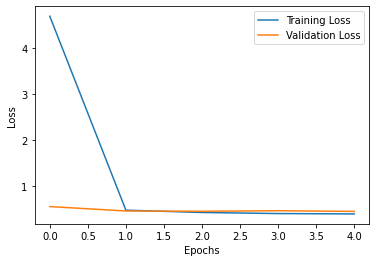

Valid Acc: 74.04%


In [ ]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_1_1_1.pt'
filters = [16]
hidden = [32]
drop_prob = 0.2
lr = 0.001
opt = 'sgd'
model = CNN_1_1(filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
acc = train_model(epochs=5, lr=lr, net=model, model_path=model_path, opt=opt)
print (f'Valid Acc: {acc:.2f}%')

Epoch: 1/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.559983 	 Train Acc: 62.00%]	 [Valid Loss: 0.453492 	 Valid Acc: 66.35%]
Valid loss decreased [inf -> 0.4534917108474239] 	 Saving Model...
Epoch: 2/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.445603 	 Train Acc: 70.00%]	 [Valid Loss: 0.427188 	 Valid Acc: 68.85%]
Valid loss decreased [0.453492 -> 0.4271880838405023] 	 Saving Model...
Epoch: 3/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.418805 	 Train Acc: 74.71%]	 [Valid Loss: 0.428854 	 Valid Acc: 71.54%]
Epoch: 4/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.381810 	 Train Acc: 76.95%]	 [Valid Loss: 0.433945 	 Valid Acc: 66.73%]
Epoch: 5/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.366113 	 Train Acc: 76.81%]	 [Valid Loss: 0.396250 	 Valid Acc: 75.00%]
Valid loss decreased [0.427188 -> 0.39624973990206924] 	 Saving Model...
Epoch: 6/20
Training... Done!!
Validating... Don

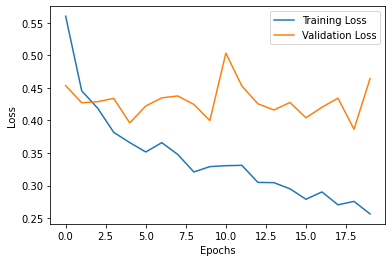

Valid Acc: 74.23%


In [ ]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_2_1.pt'
filters = [16,16,32]
hidden = [32,16]
drop_prob = 0.2
lr = 0.001
opt = 'adam'
model = CNN(conv_layers=3,dense_layers=2,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
acc = train_model(epochs=20, lr=lr, net=model, model_path=model_path, opt=opt)
print (f'Valid Acc: {acc:.2f}%')

Epoch: 1/100
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.514625 	 Train Acc: 69.48%]	 [Valid Loss: 0.457197 	 Valid Acc: 65.77%]
Valid loss decreased [inf -> 0.4571966993740885] 	 Saving Model...
Epoch: 2/100
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.385155 	 Train Acc: 75.86%]	 [Valid Loss: 0.425326 	 Valid Acc: 61.73%]
Valid loss decreased [0.457197 -> 0.4253256411434803] 	 Saving Model...
Epoch: 3/100
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.365954 	 Train Acc: 77.05%]	 [Valid Loss: 0.438371 	 Valid Acc: 74.42%]
Epoch: 4/100
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.332772 	 Train Acc: 79.48%]	 [Valid Loss: 0.406461 	 Valid Acc: 69.81%]
Valid loss decreased [0.425326 -> 0.4064613908698934] 	 Saving Model...
Epoch: 5/100
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.314828 	 Train Acc: 82.86%]	 [Valid Loss: 0.389109 	 Valid Acc: 72.31%]
Valid loss decreased [0.406461 -> 0.38910870

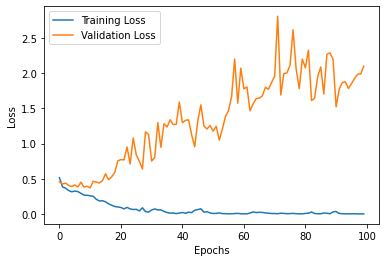

Valid Acc: 81.35%


In [ ]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_1_2.pt'
filters = [32,32,64]
hidden = [128]
drop_prob = 0.25
lr = 0.002
opt = 'adam'
model = CNN(conv_layers=3,dense_layers=1,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
acc = train_model(epochs=100, lr=lr, net=model, model_path=model_path, opt=opt)
print (f'Valid Acc: {acc:.2f}%')

Epoch: 1/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.590194 	 Train Acc: 61.29%]	 [Valid Loss: 0.501191 	 Valid Acc: 78.08%]
Valid loss decreased [inf -> 0.5011909306614856] 	 Saving Model...
Epoch: 2/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.465112 	 Train Acc: 69.90%]	 [Valid Loss: 0.428107 	 Valid Acc: 63.85%]
Valid loss decreased [0.501191 -> 0.42810700650007044] 	 Saving Model...
Epoch: 3/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.388805 	 Train Acc: 75.86%]	 [Valid Loss: 0.416414 	 Valid Acc: 67.88%]
Valid loss decreased [0.428107 -> 0.4164137650259984] 	 Saving Model...
Epoch: 4/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.381086 	 Train Acc: 75.00%]	 [Valid Loss: 0.414141 	 Valid Acc: 71.73%]
Valid loss decreased [0.416414 -> 0.4141410297415514] 	 Saving Model...
Epoch: 5/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.353594 	 Train Acc: 77.19%]	 [Valid Loss: 0.4053

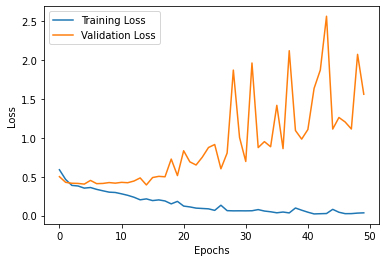

Valid Acc: 75.96%


In [ ]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_2_2.pt'
filters = [32,32,64]
hidden = [128,128]
drop_prob = 0.25
lr = 0.002
opt = 'adam'
model = CNN(conv_layers=3,dense_layers=2,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
acc = train_model(epochs=50, lr=lr, net=model, model_path=model_path, opt=opt)
print (f'Valid Acc: {acc:.2f}%')

Epoch: 1/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.622124 	 Train Acc: 55.29%]	 [Valid Loss: 0.542567 	 Valid Acc: 60.38%]
Valid loss decreased [inf -> 0.5425672445170567] 	 Saving Model...
Epoch: 2/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.479866 	 Train Acc: 71.33%]	 [Valid Loss: 0.445585 	 Valid Acc: 71.73%]
Valid loss decreased [0.542567 -> 0.4455851038221616] 	 Saving Model...
Epoch: 3/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.431800 	 Train Acc: 76.38%]	 [Valid Loss: 0.450974 	 Valid Acc: 69.04%]
Epoch: 4/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.403159 	 Train Acc: 76.29%]	 [Valid Loss: 0.427451 	 Valid Acc: 72.50%]
Valid loss decreased [0.445585 -> 0.4274512264714974] 	 Saving Model...
Epoch: 5/50
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.391703 	 Train Acc: 77.86%]	 [Valid Loss: 0.441977 	 Valid Acc: 70.00%]
Epoch: 6/50
Training... Done!!
Validating... Done

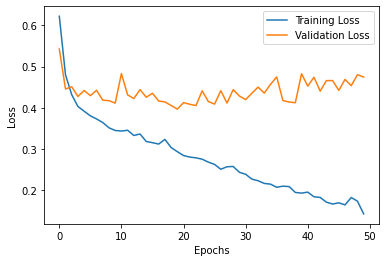

Valid Acc: 75.19%


In [ ]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_2_3.pt'
filters = [32,32,64]
hidden = [128,128]
drop_prob = 0.2
lr = 0.0001
opt = 'adam'
model = CNN(conv_layers=3,dense_layers=2,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
acc = train_model(epochs=50, lr=lr, net=model, model_path=model_path, opt=opt)
print (f'Valid Acc: {acc:.2f}%')

In [ ]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_2_3.pt'
filters = [32,32,64]
hidden = [128,128]
drop_prob = 0.2
model = CNN(conv_layers=3,dense_layers=2,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
model.load_state_dict(torch.load(model_path))
test_acc = test_model(model)
print (f'\nAccuracy on test dataset : {test_acc:.2f}%')

100%|██████████| 660/660 [08:40<00:00,  1.27it/s]

Accuracy on test dataset : 81.36%


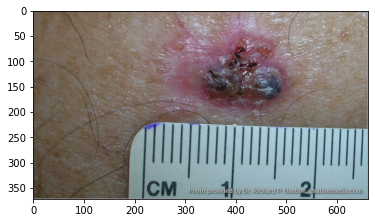

In [ ]:
test_single_path = '/content/drive/My Drive/AI/SkinCancer/TestSingle'
p_no = 1
img = Image.open(f'{test_single_path}/Patient_{p_no}.jpg')
plt.imshow(img)

In [23]:
def apply_test_transforms(inp):
    out = transforms.functional.resize(inp, [224,224])
    out = transforms.functional.to_tensor(out)
    out = transforms.functional.normalize(out, [0.5,0.5,0.5], [0.5,0.5,0.5])
    return out

def cancer_check(p_no, model):
  test_single_path = '/content/drive/My Drive/AI/SkinCancer/TestSingle'
  img = Image.open(f'{test_single_path}/Patient_{p_no}.jpg')
  #plt.imshow(img)

  im_as_tensor = apply_test_transforms(img)
  #print(im_as_tensor.size())
  minibatch = torch.stack([im_as_tensor])
  #print(minibatch.size())

  pred = model(minibatch.cuda())
  result = 1 if pred.item() > 0.7 else 0
  if result == 1:
    print (f'Patient has {pred.item()*100:.2f}% chance of having skin cancer.')
  else:
    print (f'Malignant chances with {pred.item()*100:.2f}')

In [ ]:
cancer_check(1)

Patient has 86.22% chance of having skin cancer.


In [ ]:
cancer_check(p_no=2)

Patient has 98.61% chance of having skin cancer.


In [ ]:
cancer_check(p_no=3)

Patient do not have skin cancer.


Epoch: 1/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.500355 	 Train Acc: 68.33%]	 [Valid Loss: 0.455134 	 Valid Acc: 70.38%]
Valid loss decreased [inf -> 0.45513438318893173] 	 Saving Model...
Epoch: 2/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.392679 	 Train Acc: 75.81%]	 [Valid Loss: 0.412197 	 Valid Acc: 72.31%]
Valid loss decreased [0.455134 -> 0.4121969411223844] 	 Saving Model...
Epoch: 3/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.360876 	 Train Acc: 78.76%]	 [Valid Loss: 0.410390 	 Valid Acc: 74.42%]
Valid loss decreased [0.412197 -> 0.4103895722123206] 	 Saving Model...
Epoch: 4/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.357942 	 Train Acc: 77.38%]	 [Valid Loss: 0.404139 	 Valid Acc: 77.88%]
Valid loss decreased [0.410390 -> 0.40413918599231874] 	 Saving Model...
Epoch: 5/20
Training... Done!!
Validating... Done!!
Metrics: [Train Loss: 0.337346 	 Train Acc: 80.57%]	 [Valid Loss: 0.413

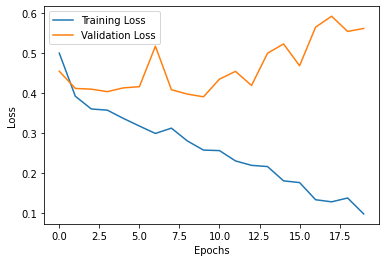

Valid Acc: 80.77%


In [16]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_2_4.pt'
filters = [32,32,64]
hidden = [256,128]
drop_prob = 0.2
lr = 0.001
opt = 'adam'
model = CNN(conv_layers=3,dense_layers=2,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
acc = train_model(epochs=20, lr=lr, net=model, model_path=model_path, opt=opt)
print (f'Valid Acc: {acc:.2f}%')

In [71]:
model_path = '/content/drive/My Drive/AI/SkinCancer/OutputModels/model_3_2_4.pt'
filters = [32,32,64]
hidden = [256,128]
drop_prob = 0.2
model = CNN(conv_layers=3,dense_layers=2,filters = filters, hidden = hidden, drop_prob=drop_prob).to(device)
model.load_state_dict(torch.load(model_path))
test_acc, recall = test_model(model)
print (f'\nAccuracy on test dataset : {test_acc:.2f}%')
print (f'Recall : {recall}')


Accuracy on test dataset : 80.30%
Recall : 0.6833333373069763


In [26]:
cancer_check(1, model)

Patient has 99.68% chance of having skin cancer.


In [25]:
cancer_check(2, model)

Patient has 99.99% chance of having skin cancer.


In [24]:
cancer_check(3, model)

Malignant chances with 64.70


In [29]:
cancer_check(4, model)

Patient has 99.99% chance of having skin cancer.
